In [88]:
import spikeinterface.full as si
import probeinterface as pi
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import os

In [42]:
npx1_path = '/Users/manishm/Dropbox (Dartmouth College)/NSB2023/23242/01_7_6_23/HC101_23242_g0'
npx2_path = '/Users/manishm/Dropbox (Dartmouth College)/NSB2023/23242/02_7_7_23/HC_2_Neuro2_g0/'

In [51]:
si.get_neo_streams('spikeglx',npx1_path)

(['imec0.ap', 'nidq', 'imec0.lf'], ['imec0.ap', 'nidq', 'imec0.lf'])

In [62]:
probe = si.read_spikeglx(os.path.join(npx2_path, 'HC_2_Neuro2_g0_t0.nidq.meta'), stream_name=)

IndexError: list index out of range

In [60]:
os.path.join(npx2_path, 'HC_2_Neuro2_g0_imec0', 'HC_2_Neuro2_g0_t0.imec0.ap.meta')

'/Users/manishm/Dropbox (Dartmouth College)/NSB2023/23242/02_7_7_23/HC_2_Neuro2_g0/HC_2_Neuro2_g0_imec0/HC_2_Neuro2_g0_t0.imec0.ap.meta'

In [61]:
os.path.join(npx2_path, 'HC_2_Neuro2_g0_t0.nidq.meta')

'/Users/manishm/Dropbox (Dartmouth College)/NSB2023/23242/02_7_7_23/HC_2_Neuro2_g0/HC_2_Neuro2_g0_t0.nidq.meta'

In [ ]:
si.read_spikeglx()

In [52]:
raw_rec = si.read_spikeglx(npx2_path, stream_name='imec0.ap')
ttls = si.read_spikeglx(npx2_path, stream_name='nidq')

In [65]:
this_probe = raw_rec.get_probe()

In [90]:
this_probe.ndim

2

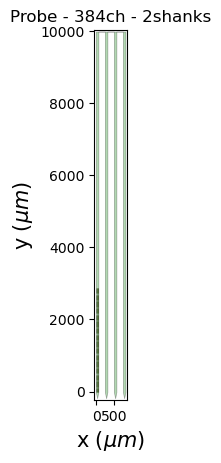

In [91]:
q0,q1 = pi.plotting.plot_probe(this_probe)

In [94]:
vertices = this_probe.get_contact_vertices()

In [70]:
np.shape(raw_rec.get_channel_locations())

(384, 2)

'nidq#AX4' is the odor TTL\
'nidq#AX1' is a quadrature signal\
'nidq#AX2' is a quadrature signal

In [7]:
this_ids = ['nidq#XA1', 'nidq#XA2', 'nidq#XA4']
this_gain = [ttls.get_channel_property(channel_id=x, key='gain_to_uV') for x in this_ids]
this_offset = [ttls.get_channel_property(channel_id=x, key='offset_to_uV') for x in this_ids]

In [ ]:
# TODO Plot quadrature signals and decoded speed
plt.plot(ttls.get_traces(channel_ids=[this_ids[0]])*this_gain[0] + this_offset[0])
plt.plot(ttls.get_traces(channel_ids=[this_ids[1]])*this_gain[1] + this_offset[1])

# Plotting the Odor indicator to see how to threshold

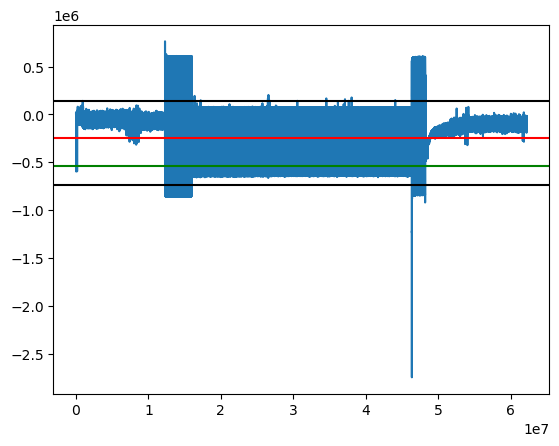

In [8]:
this_signal = ttls.get_traces(channel_ids=[this_ids[2]])*this_gain[2] + this_offset[2]
plt.plot(this_signal)
plt.axhline(np.mean(this_signal) + np.std(this_signal), color='black')
plt.axhline(np.mean(this_signal) - np.std(this_signal), color='red')
plt.axhline(np.mean(this_signal) - 2.5*np.std(this_signal), color='green')
plt.axhline(np.mean(this_signal) - 3.5*np.std(this_signal), color='black')

In [13]:
#The onset times are such that they are less than 2.5 SDs 
#and greater than 3.5 SDs but also the previous time should be  greater than 2.5 SDs
thresh1 = np.mean(this_signal) - 2.5*np.std(this_signal);
thresh2 = np.mean(this_signal) - 3.5*np.std(this_signal);

In [38]:
temp_idx = np.argwhere((this_signal < thresh1) & (this_signal > thresh2))

In [39]:
temp_idx = [x[0] for x in temp_idx]

In [40]:
np.take(this_signal, temp_idx)

array([-546722.41210938, -543670.65429688, -551605.22460938, ...,
       -626678.46679688, -630950.92773438, -652313.23242188])

In [31]:
np.shape(onset_idx)

(1734213, 2)

In [28]:
np.shape(this_signal)

(62250189, 1)

(-100.0, 4000.0)

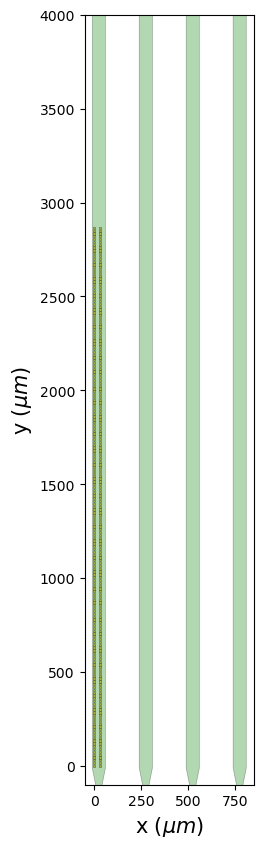

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
si.plot_probe_map(raw_rec, ax=ax, with_channel_ids=False)
ax.set_ylim(-100, 4000)

In [ ]:
bad_channel_ids, channel_labels = si.detect_bad_channels(raw_rec)

In [ ]:
channel_labels